# <center>PROYECTO INDIVIDUAL SINIESTROS VIALES (CABA)<center>

## <center>EDA (Analisis Exploratorio de Datos)<center>

### DATASETS: Los mismos se encuentran alojados en la página https://data.buenosaires.gob.ar/dataset.

### A continuación nos conectaremos con Python, a través de jupyter notebooks para explorar cuántas páginas tiene cada dataset, por pedido de Henry, los archivos a analizar tienen de nombre:
   1) Homicidos
   2) Lesiones


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# URLs de los libros de Excel
url_homicidios = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/victimas-siniestros-viales/homicidios.xlsx"
url_lesiones = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/victimas-siniestros-viales/lesiones.xlsx"

# Leer los libros de Excel y obtener información sobre las hojas
xls_homicidios = pd.ExcelFile(url_homicidios)
xls_lesiones = pd.ExcelFile(url_lesiones)

# Obtener nombres de las hojas y cantidad de hojas
nombres_hojas_homicidios = xls_homicidios.sheet_names
nombres_hojas_lesiones = xls_lesiones.sheet_names
cantidad_hojas_homicidios = len(nombres_hojas_homicidios)
cantidad_hojas_lesiones = len(nombres_hojas_lesiones)

# Imprimir información sobre las hojas
print("Libro de Excel 'Homicidios.xlsx':")
print("Número de hojas:", cantidad_hojas_homicidios)
print("Nombres de las hojas:", nombres_hojas_homicidios)

print("\nLibro de Excel 'Lesiones.xlsx':")
print("Número de hojas:", cantidad_hojas_lesiones)
print("Nombres de las hojas:", nombres_hojas_lesiones)



Libro de Excel 'Homicidios.xlsx':
Número de hojas: 5
Nombres de las hojas: ['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS', 'clas']

Libro de Excel 'Lesiones.xlsx':
Número de hojas: 4
Nombres de las hojas: ['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS']


In [2]:
# Leer y mostrar una hoja específica de cada libro de Excel
#1 datasets de Homocidios
h_hechos = df_homicidios_primera_hoja = pd.read_excel(url_homicidios, sheet_name=nombres_hojas_homicidios[0])
h_diccionario_hechos  = df_homicidios_primera_hoja = pd.read_excel(url_homicidios, sheet_name=nombres_hojas_homicidios[1])
h_victimas = df_homicidios_primera_hoja = pd.read_excel(url_homicidios, sheet_name=nombres_hojas_homicidios[2])
h_diccionario_victimas = df_homicidios_primera_hoja = pd.read_excel(url_homicidios, sheet_name=nombres_hojas_homicidios[3])
clas = df_homicidios_primera_hoja = pd.read_excel(url_homicidios, sheet_name=nombres_hojas_homicidios[4])

#2 datasets de Lesiones
l_hechos = pd.read_excel(url_lesiones, sheet_name=nombres_hojas_lesiones[0])
l_diccionario_hechos = pd.read_excel(url_lesiones, sheet_name=nombres_hojas_lesiones[1])
l_victimas = pd.read_excel(url_lesiones, sheet_name=nombres_hojas_lesiones[2])
l_diccionario_victimas = pd.read_excel(url_lesiones, sheet_name=nombres_hojas_lesiones[3])

<center><h2>Analisis de hoja Hechos del dataset Homicidios por página del dataset<h2><center>

<h3>Valores faltantes:<h3>
    Se observa que las columnas "Altura" y "Cruce" tienen una cantidad significativa de valores faltantes. Esto podría requerir imputación de datos o consideración especial durante el análisis.

In [3]:
h_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

# Detalles de dataset homicidios:

#### Luego de analizar todas las columnas, se deja resumen de que datos trae el dataset

| Columna                  | Descripción                                                                                        | Tipo de dato         |
|--------------------------|----------------------------------------------------------------------------------------------------|----------------------|
| ID                       | id único del hecho tipo, código alfanumérico                                                       | Cadena de caracteres |
| N_VICTIMAS               | cantidad de víctimas por hecho, número entero                                                       | Número entero        |
| FECHA                    | fecha completa del hecho, fecha completa                                                            | Fecha completa       |
| AAAA                     | año del hecho, número entero                                                                       | Número entero        |
| MM                       | mes del hecho, número entero                                                                       | Número entero        |
| DD                       | día del hecho, número entero                                                                       | Número entero        |
| HORA                     | hora del hecho, formato hora                                                                       | Hora                 |
| HH                       | hora del hecho en formato número entero                                                             | Número entero        |
| LUGAR_DEL_HECHO          | cadena de caracteres indicando calle y altura, o calle, o cruce del hecho                          | Cadena de caracteres|
| TIPO_DE_CALLE            | indica el tipo de calle donde sucedió el hecho: 'AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'        | Cadena de caracteres|
| Calle                    | nombre de la calle principal de donde sucedió el hecho                                             | Cadena de caracteres|
| Altura                   | altura de la calle donde sucedió el hecho, en caso de que no sea cruce, pueden haber valores nulos | Número entero        |
| Cruce                    | cruce de la calle secundaria donde sucedió el hecho, pueden haber valores nulos                    | Cadena de caracteres|
| Dirección Normalizada    | dirección de calle con altura, o calle y cruce, según corresponda, pueden haber valores nulos      | Cadena de caracteres|
| COMUNA                   | comuna de CABA donde sucedió el hecho, valores: 0-15                                               | Número entero        |
| XY (CABA)                | punto de posición (latitud, longitud) donde sucedió el hecho                                       | Punto                |
| pos y                    | longitud del punto donde sucedió el hecho                                                          | Número decimal       |
| pos x                    | latitud del punto donde sucedió el hecho                                                           | Número decimal       |
| PARTICIPANTES            | las partes implicadas del hecho, donde el de la izquierda es víctima y el de la derecha acusado    | Cadena de caracteres|
| VICTIMA                  | víctima del hecho                                                                                  | Cadena de caracteres|
| ACUSADO                  | acusado del hecho                                                                                  | Cadena de caracteres|


### Ahora que se revisó el dataset, se entiende que los vacios en altura o cruce es porque o se llena la columna "Altura" o la columna "Cruce", el valor correcto a tomar es "DIreccion Normalizada", que es la concatenacion correcta de la columna "Calle" + "Altura" + " Cruce"

## Es importante entender cuantas víctimas suele haber por accidente, lo veremos en un gráfico cualitativo de torta agrupando por N de victimas por siniestro

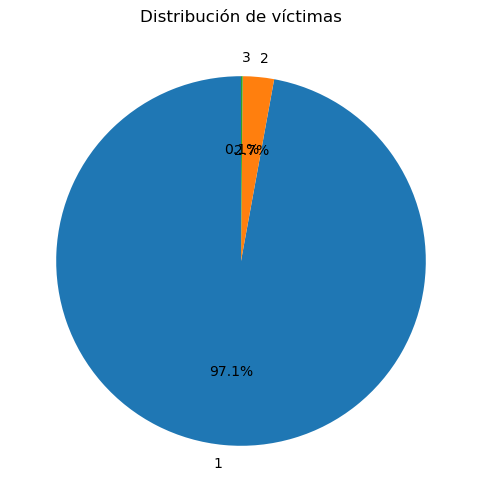

In [4]:
# Agrupar por la columna 'VICTIMA' y contar las ocurrencias
victima_counts = h_hechos['N_VICTIMAS'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
victima_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de víctimas')
plt.ylabel('')

# Mostrar el gráfico
plt.show()


## Para confirmar lo anterior, haremos una visual en un gráfico cuantitativo

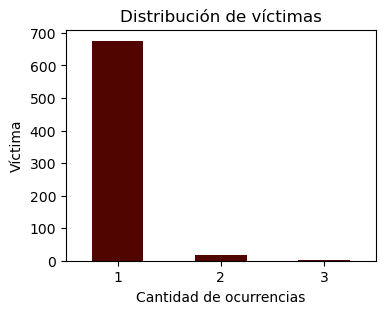

In [5]:
warnings.filterwarnings('ignore')

# Agrupar por la columna 'N_VICTIMAS' y contar las ocurrencias
victima_counts = h_hechos['N_VICTIMAS'].value_counts()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(4, 3))
victima_counts.plot(kind='bar', color='#500500')
plt.title('Distribución de víctimas')
plt.xlabel('Cantidad de ocurrencias')
plt.ylabel('Víctima')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()


#### Queda claro que la máxima tendencia de fatalidad es 1 persona por accidente con homicidios

## Visualización en grafico cuantitativo de barras, total de victimas por año

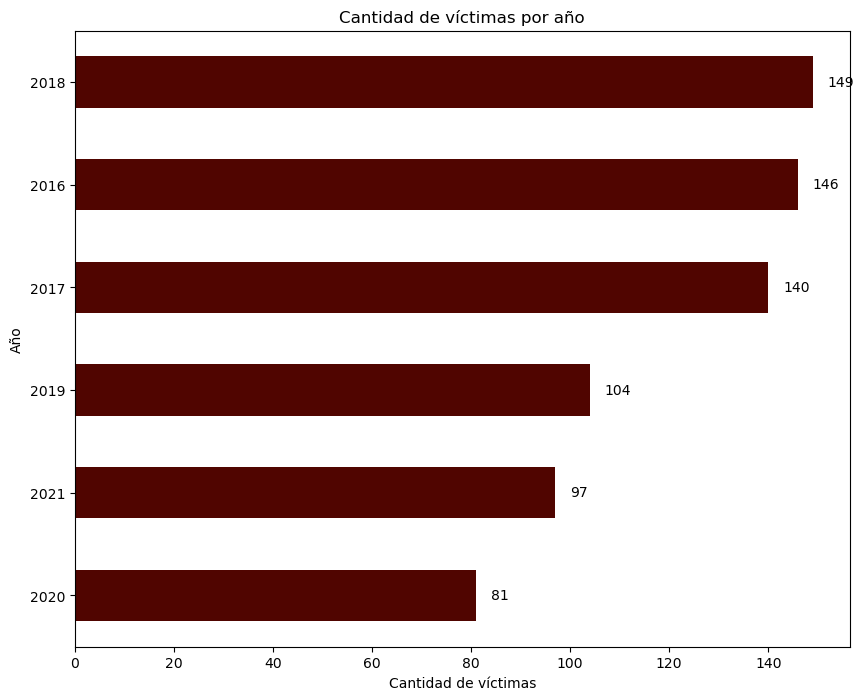

In [6]:
# Agrupar por año y sumar las víctimas
victimas_por_año = h_hechos.groupby('AAAA')['N_VICTIMAS'].sum()

# Ordenar los años de mayor a menor en cuanto al total de N_VICTIMAS
victimas_por_año = victimas_por_año.sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
ax = victimas_por_año.plot(kind='barh', color='#500500')

# Agregar el total en las etiquetas
for i, v in enumerate(victimas_por_año):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.title('Cantidad de víctimas por año')
plt.xlabel('Cantidad de víctimas')
plt.ylabel('Año')

# Mostrar el gráfico
plt.show()


## Gráfico de barras para ver la cantidad de victimas que hubo por día por año

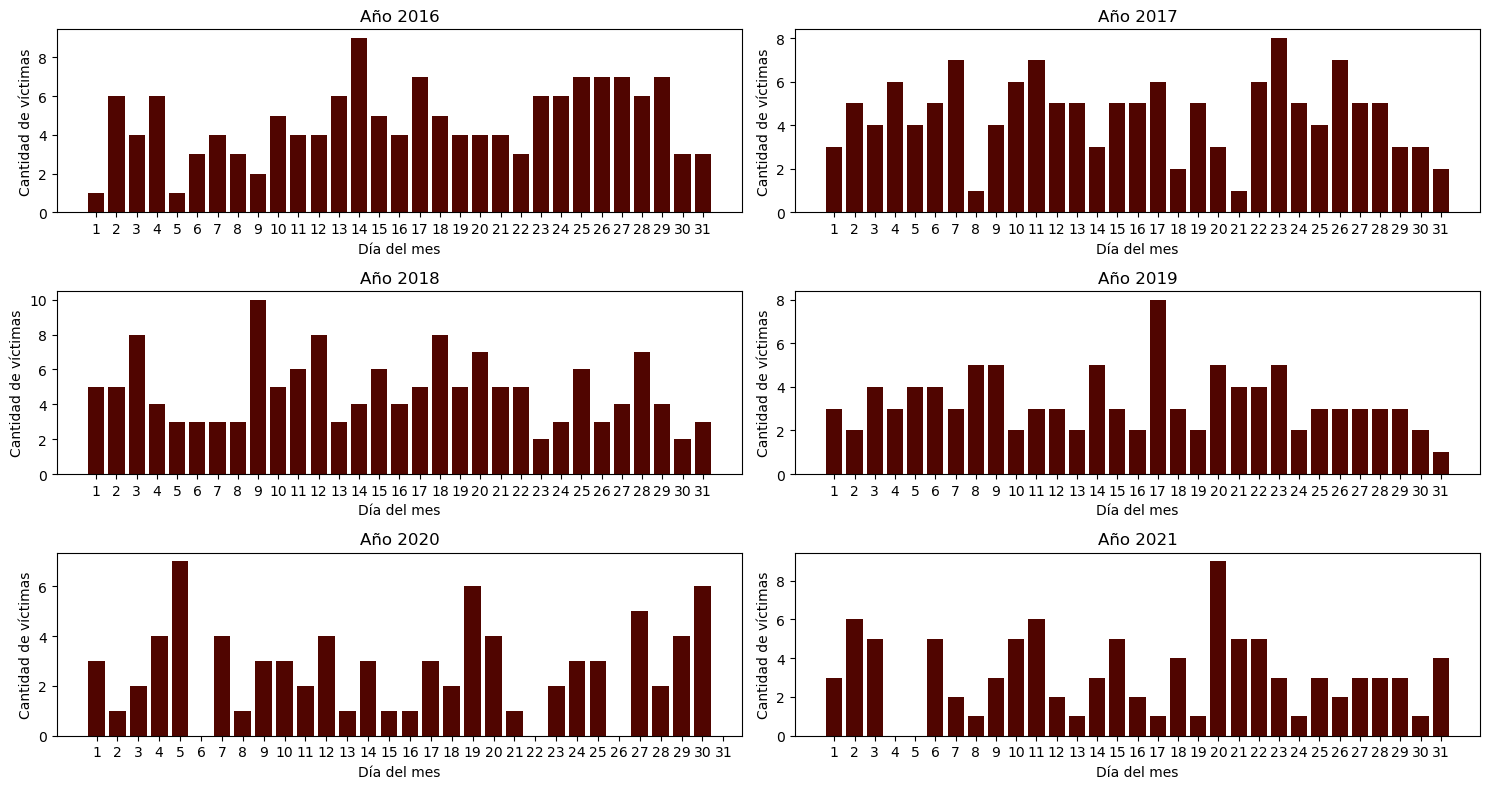

In [7]:
h_hechos['Dia'] = h_hechos['FECHA'].dt.day
h_hechos['Mes'] = h_hechos['FECHA'].dt.month
h_hechos['Año'] = h_hechos['FECHA'].dt.year

# Dividir los datos por año
datos_por_año = h_hechos.groupby('Año')

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 8))

# Graficar por día, mes y año
for i, (año, datos_año) in enumerate(datos_por_año):
    plt.subplot(3, 2, i+1)
    datos_por_dia = datos_año.groupby('Dia')['N_VICTIMAS'].sum()
    plt.bar(datos_por_dia.index, datos_por_dia.values, color ="#500500")
    plt.title(f'Año {año}')
    plt.xlabel('Día del mes')
    plt.ylabel('Cantidad de víctimas')
    plt.xticks(np.arange(1, 32))  # Mostrar todos los días en el eje x

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Gráfico de barras para ver la cantidad de victimas que hubo por año

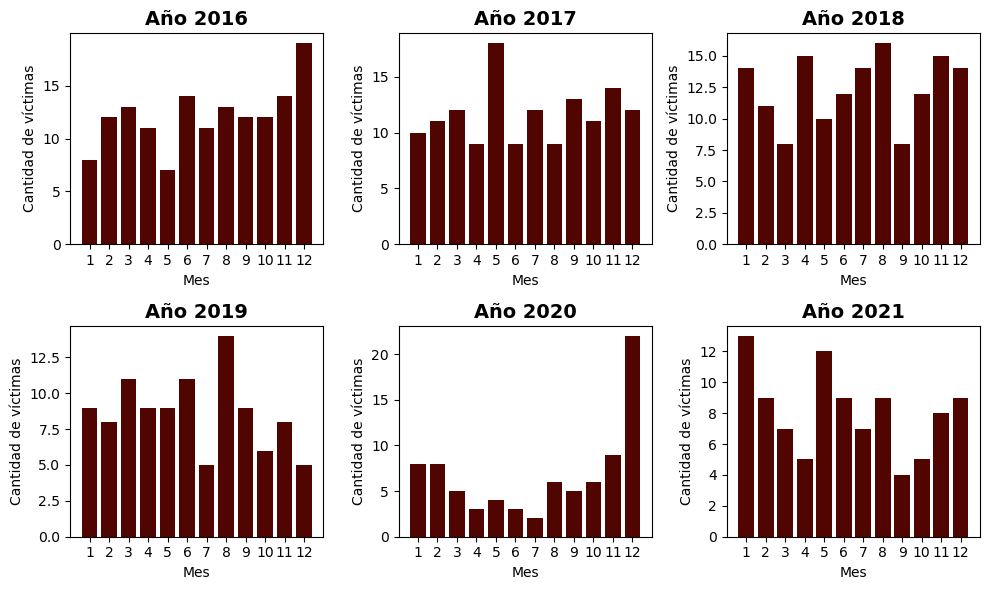

In [8]:
# Dividir los datos por año
datos_por_año = h_hechos.groupby('Año')

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar por día, mes y año
for i, (año, datos_año) in enumerate(datos_por_año):
    plt.subplot(2, 3, i+1)
    datos_por_mes = datos_año.groupby('Mes')['N_VICTIMAS'].sum()
    plt.bar(datos_por_mes.index, datos_por_mes.values, color="#500500")
    plt.title(f'Año {año}', fontsize=14, fontweight='bold')  # Título más grande y en negrita
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de víctimas')
    plt.xticks(np.arange(1, 13))  # Mostrar todos los meses en el eje x

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Gráfico de dispersión para visualizar cuantitativamente victimas por día, mes y año

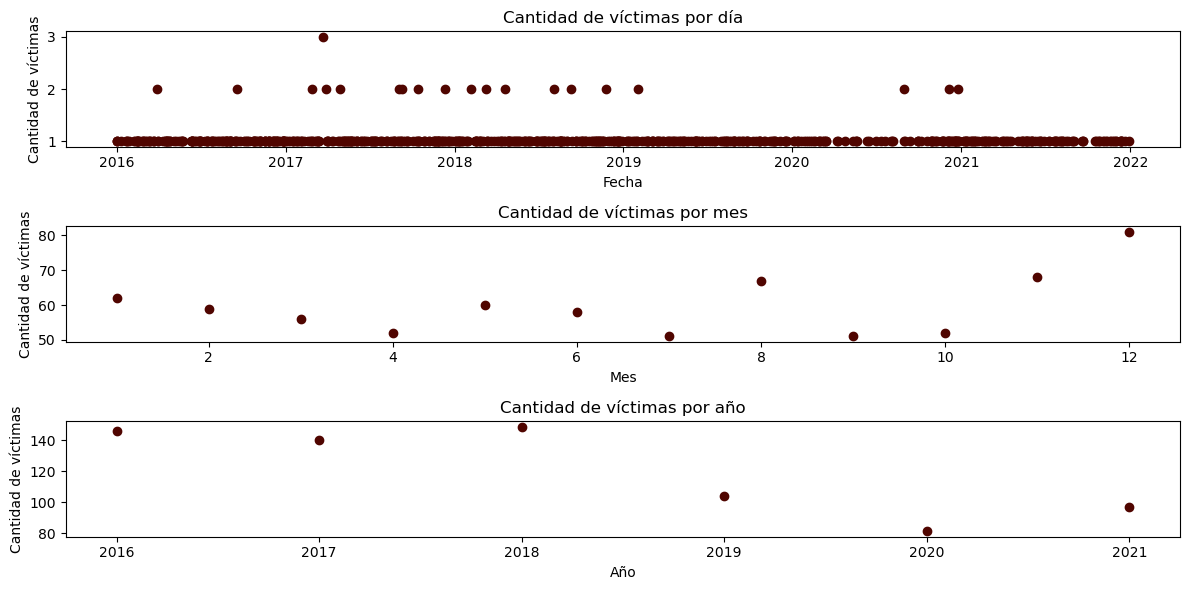

In [9]:
warnings.filterwarnings('ignore')

# Crear una nueva figura
plt.figure(figsize=(12, 6))

# Graficar la cantidad total de víctimas por día
plt.subplot(3, 1, 1)
plt.scatter(h_hechos['FECHA'], h_hechos['N_VICTIMAS'], color = "#500500")
plt.title('Cantidad de víctimas por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de víctimas')

# Graficar la cantidad total de víctimas por mes
plt.subplot(3, 1, 2)
victimas_por_mes = h_hechos.groupby('Mes')['N_VICTIMAS'].sum()
plt.scatter(victimas_por_mes.index, victimas_por_mes.values, color = "#500500")
plt.title('Cantidad de víctimas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de víctimas')

# Graficar la cantidad total de víctimas por año
plt.subplot(3, 1, 3)
victimas_por_año = h_hechos.groupby('Año')['N_VICTIMAS'].sum()
plt.scatter(victimas_por_año.index, victimas_por_año.values, color = "#500500")
plt.title('Cantidad de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Grafico de caja y bigotes para ver rapidamente los outliers

### Se verifica que el 2020 año de pandemia entra dentro de los cuartiles con menores homicidos por siniestros viales, sin embargo, tiene outliers en picos altos en algunos meses

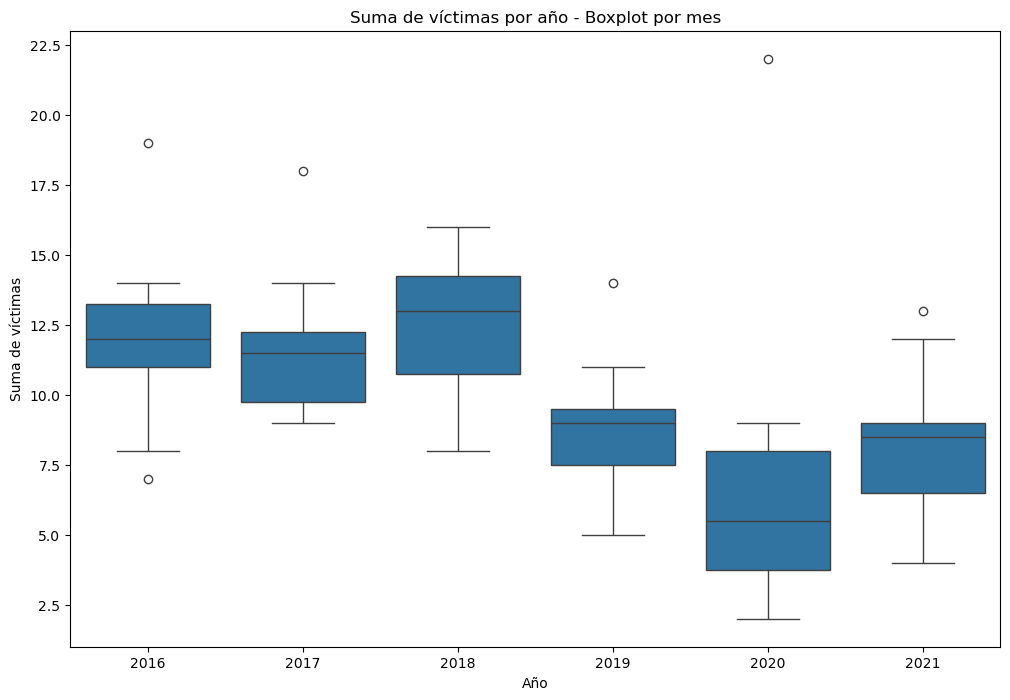

In [10]:
# Calcular la suma de víctimas por año y mes
suma_victimas = h_hechos.groupby(['AAAA', 'MM'])['N_VICTIMAS'].sum().reset_index()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de caja y bigotes para cada año
sns.boxplot(x='AAAA', y='N_VICTIMAS', data=suma_victimas)

# Añadir etiquetas para outliers
for año, datos in suma_victimas.groupby('AAAA'):
    Q1 = datos['N_VICTIMAS'].quantile(0.25)
    Q3 = datos['N_VICTIMAS'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = datos[(datos['N_VICTIMAS'] < Q1 - 1.5 * IQR) | (datos['N_VICTIMAS'] > Q3 + 1.5 * IQR)]
    for i, fila in outliers.iterrows():
        plt.annotate(f"{fila['N_VICTIMAS']}", xy=(fila['AAAA'], fila['N_VICTIMAS']), xytext=(-15, 10), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

# Título y etiquetas de ejes
plt.title('Suma de víctimas por año - Boxplot por mes')
plt.xlabel('Año')
plt.ylabel('Suma de víctimas')

# Mostrar el gráfico
plt.show()


## Gráfico de barras para visualizar cantidad de homicidios por tipo de acusado

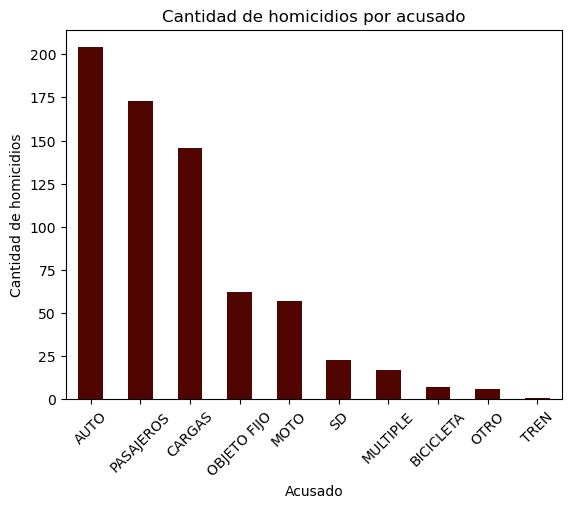

In [11]:
acusados_counts = h_hechos['ACUSADO'].value_counts()


# Crear una lista de colores aleatorios
num_acusados = len(acusados_counts)
colores = np.random.rand(num_acusados, 3)  # RGB values

# Visualización de los resultados con colores aleatorios
acusados_counts.plot(kind='bar', color="#500500")
plt.title('Cantidad de homicidios por acusado')
plt.xlabel('Acusado')
plt.ylabel('Cantidad de homicidios')
plt.xticks(rotation=45)
plt.show()


## Gráfico de barras para visualizar cantidad de homicidios por tipo de acusado

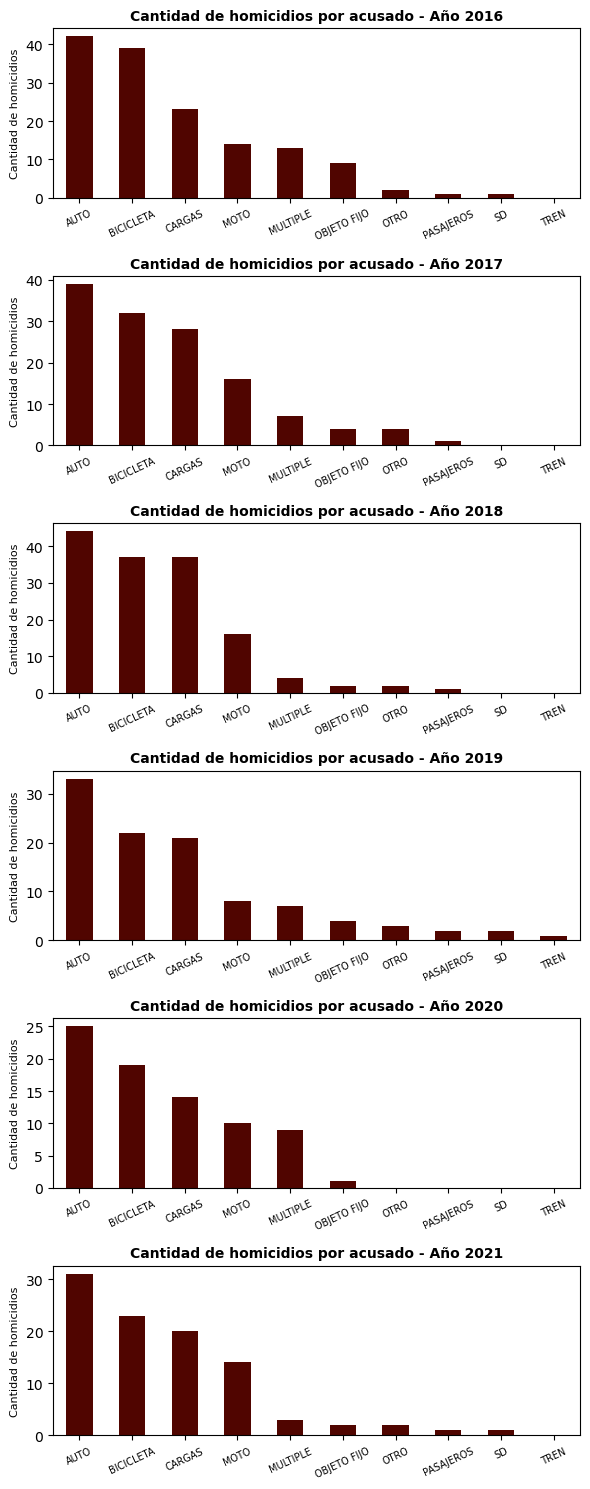

In [12]:
# Crear una columna de año
h_hechos['Año'] = h_hechos['FECHA'].dt.year

# Cantidad de homicidios por acusado y por año
acusados_por_año = h_hechos.groupby(['ACUSADO', 'Año']).size().unstack(fill_value=0)

# Obtener la cantidad de años en el dataset
cantidad_años = len(h_hechos['Año'].unique())

# Visualización de los resultados
fig, axs = plt.subplots(cantidad_años, 1, figsize=(6, cantidad_años * 2.5))

for i, año in enumerate(h_hechos['Año'].unique()):
    acusados_por_año[año].sort_values(ascending=False).plot(kind='bar', ax=axs[i], color="#500500")
    axs[i].set_title(f'Cantidad de homicidios por acusado - Año {año}', fontsize=10, fontweight='bold')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Cantidad de homicidios', fontsize=8)
    axs[i].set_xticklabels(acusados_por_año.index, fontsize=7, rotation=25)
    axs[i].legend().set_visible(False)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()


## Gráfico de barras para visualizar cantidad de vicitmas por comuna

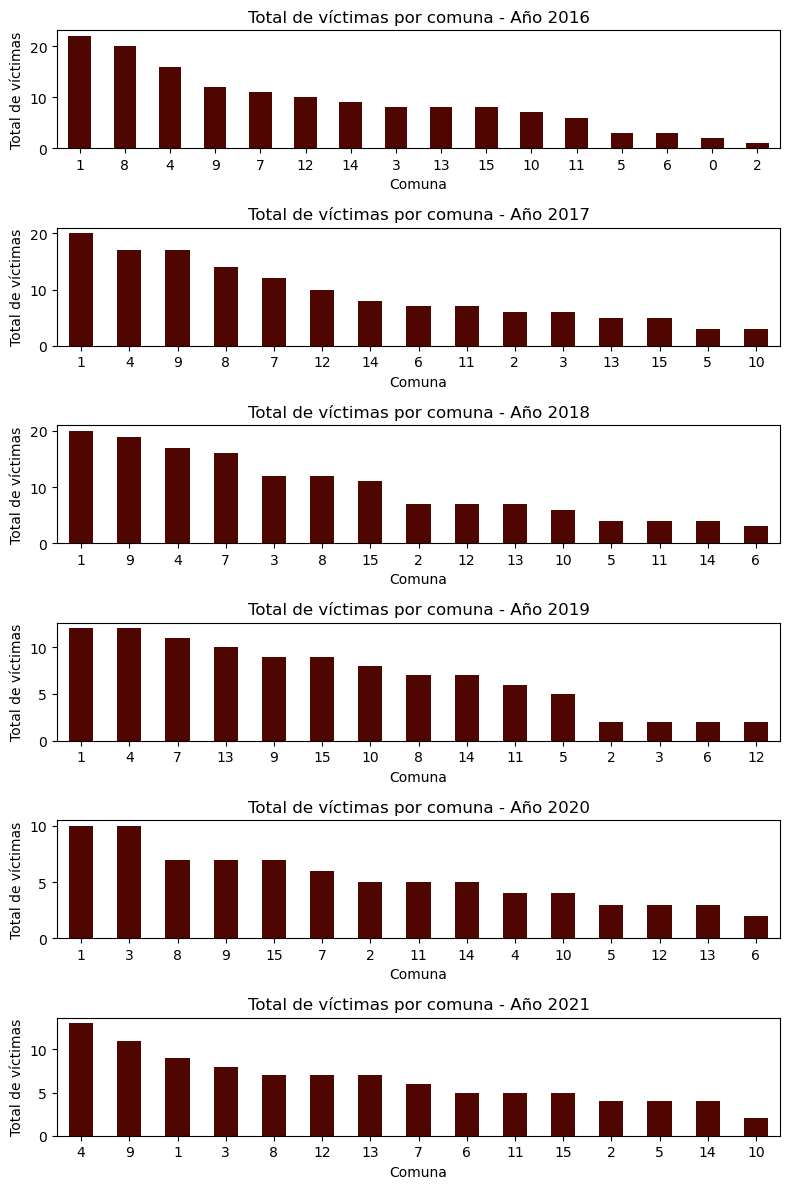

In [13]:
# Obtener los años únicos en el dataset
años_unicos = sorted(h_hechos['Año'].unique())

# Configurar el tamaño de la figura
fig, axs = plt.subplots(len(años_unicos), 1, figsize=(8, 2 * len(años_unicos)))

# Graficar el total de víctimas por año y comuna
for i, año in enumerate(años_unicos):
    datos_año = h_hechos[h_hechos['Año'] == año].groupby('COMUNA')['N_VICTIMAS'].sum().sort_values(ascending=False)
    datos_año.plot(kind='bar', ax=axs[i], color='#500600')
    axs[i].set_title(f'Total de víctimas por comuna - Año {año}')
    axs[i].set_ylabel('Total de víctimas')
    axs[i].set_xlabel('Comuna')
    axs[i].tick_params(axis='x', rotation=0)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


## Mayor cantidad de fatalidades por comuna

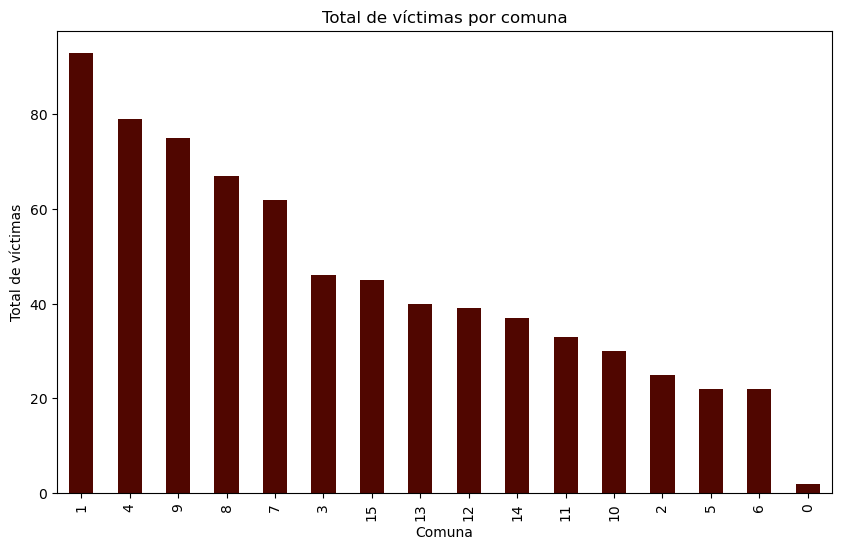

In [14]:
# Agrupar por comuna y sumar las víctimas
total_victimas_por_comuna = h_hechos.groupby('COMUNA')['N_VICTIMAS'].sum().sort_values(ascending=False)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el total de víctimas por comuna
total_victimas_por_comuna.plot(kind='bar', color='#500600')

plt.title('Total de víctimas por comuna')
plt.ylabel('Total de víctimas')
plt.xlabel('Comuna',rotation=0)

# Mostrar el gráfico
plt.show()


## Gráfico cualitativo de torta para entender si los cruces tienden a tener más accidentes o no

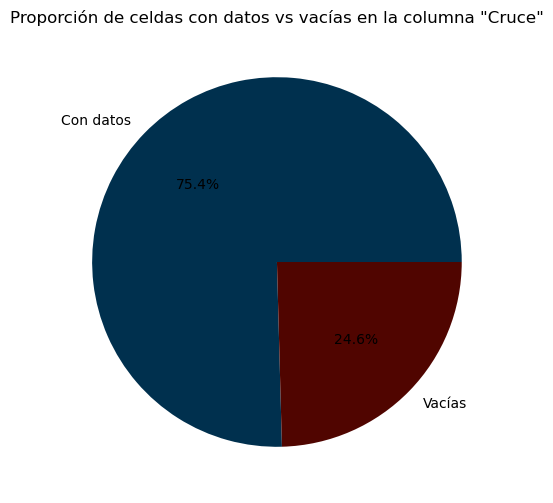

In [15]:
# Contar celdas con datos y vacías en la columna 'Cruce'
celdas_con_datos = h_hechos['Cruce'].notna().sum()
celdas_vacias = h_hechos['Cruce'].isna().sum()

# Crear una lista con los nombres de las porciones de la torta
nombres_porciones = ['Con datos', 'Vacías']

# Crear una lista con los valores de las porciones de la torta
valores_porciones = [celdas_con_datos, celdas_vacias]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el gráfico de torta
plt.pie(valores_porciones, labels=nombres_porciones, autopct='%1.1f%%', colors=['#00304E', '#500500'])

# Agregar título
plt.title('Proporción de celdas con datos vs vacías en la columna "Cruce"')

# Mostrar el gráfico
plt.show()


## Ahora seguiremos con gráfico cuantitativo para ver cantidades de siniestros en cruces y los que no

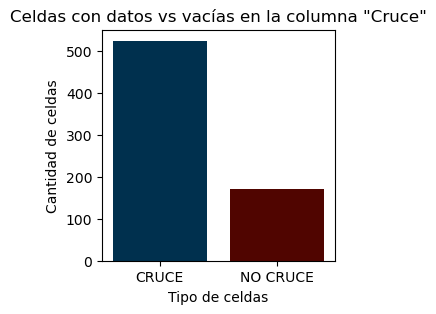

In [16]:
# Contar celdas con datos y vacías en la columna 'Cruce'
celdas_con_datos = h_hechos['Cruce'].notna().sum()
celdas_vacias = h_hechos['Cruce'].isna().sum()

# Crear una lista con los nombres de las barras
nombres_barras = ['CRUCE', 'NO CRUCE']

# Crear una lista con los valores de las barras
valores_barras = [celdas_con_datos, celdas_vacias]

# Configurar el tamaño de la figura
plt.figure(figsize=(3, 3))

# Crear el gráfico de barras
plt.bar(nombres_barras, valores_barras, color=['#00304E', '#500500'])

# Agregar título y etiquetas
plt.title('Celdas con datos vs vacías en la columna "Cruce"')
plt.xlabel('Tipo de celdas')
plt.ylabel('Cantidad de celdas')

# Mostrar el gráfico
plt.show()


# <center>Analisis del diccionario de hechos Homicidios del dataset

#### Se verifican datos nulos en la columna ["Unnamed2"] que llaman la atención, revisando el dataset completo se entiendo que son tablas anexadas (una sobre otra) y que provoca un poco de confusión para interpretar
#### En cuanto a los valores NaN de la columna ["variables y definiciones"] se entiende que se podría rellenar hacia abajo y darle sentido a la tabla

In [17]:
h_diccionario_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   variables y definiciones  26 non-null     object
 1   descripción               45 non-null     object
 2   Unnamed: 2                24 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


## <center>Analisis de la hoja "victimas" del dataset Homicidios

#### A simple vista se ve una tabla bien ordenada y sin datos nulos, quizas sería ideal transformar algunas columnas como "ID_hecho" a int, ya que es un object

In [18]:
h_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [19]:
h_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


## Gráfico de barras para visualizar víctimas por género

### Se verifica que hay celdas sin datos

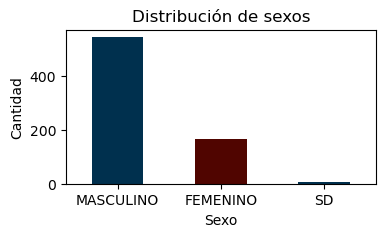

In [20]:
# Gráfico de barras para la distribución de sexos
plt.figure(figsize=(4, 2))
h_victimas['SEXO'].value_counts().plot(kind='bar', color=['#00304E', '#500500'])
plt.title('Distribución de sexos')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


## Gráfico de torta para visualizar en que grupo de edades hay mayor cantidad de víctimas

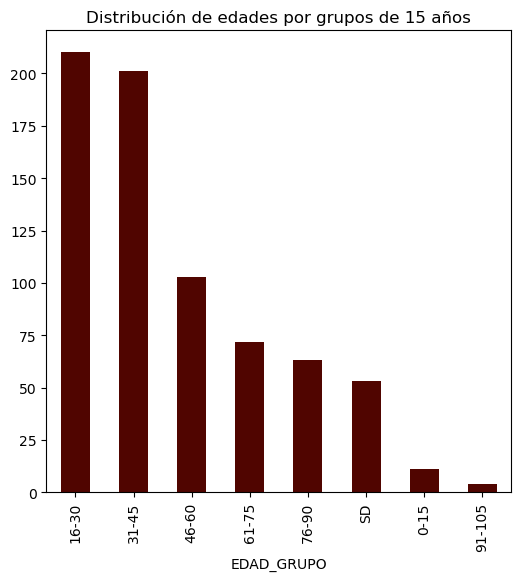

In [21]:
#en la columna edad se encuentran datos tipo int, sin embargo, tambiém aparece str SD,
#por lo cual decidí cambiarlo temporalmente por el n -1 para que sean todos tipo int, 
#luego lo etiqueto como SD para entender los que son "sin datos

# Reemplazar 'SD' por -1 en la columna 'EDAD'
h_victimas['EDAD'].replace('SD', -1, inplace=True)

# Crear grupos de edades de 15 años de diferencia
bins = [-1, 0, 15, 30, 45, 60, 75, 90, 105]
labels = ["SD",'0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '91-105']
h_victimas['EDAD_GRUPO'] = pd.cut(h_victimas['EDAD'].astype(int), bins=bins, labels=labels, right=False)

# Gráfico de torta para la distribución de edades por grupos
plt.figure(figsize=(6, 6))
h_victimas['EDAD_GRUPO'].value_counts().plot(kind='bar', color="#500500")
plt.title('Distribución de edades por grupos de 15 años')
plt.ylabel('')
plt.show()


## Gráfico de barra para visualizar en que grupo de ocurrencias hay mayor cantidad de víctimas

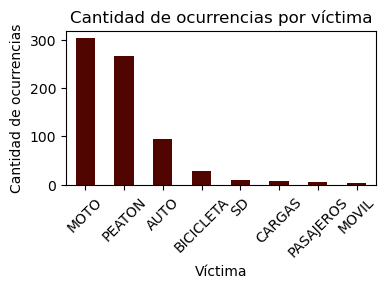

In [22]:
import matplotlib.pyplot as plt

# Gráfico de barras para la cantidad de ocurrencias por víctima
plt.figure(figsize=(4, 2))
h_victimas['VICTIMA'].value_counts().plot(kind='bar', color='#500500')
plt.title('Cantidad de ocurrencias por víctima')
plt.xlabel('Víctima')
plt.ylabel('Cantidad de ocurrencias')
plt.xticks(rotation=45)
plt.show()



## Gráfico de barras para visualizar cada tipo de rol de las víctimas

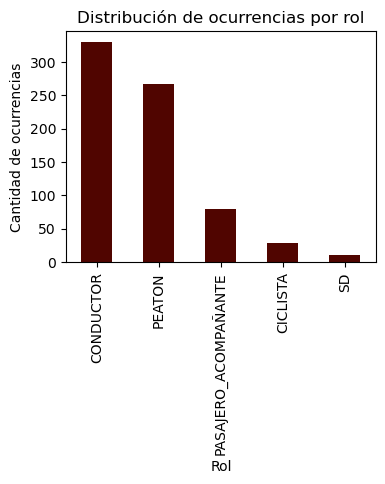

In [23]:
import matplotlib.pyplot as plt

# Gráfico de barras para la distribución de ocurrencias por rol
plt.figure(figsize=(4, 3))
h_victimas['ROL'].value_counts().plot(kind='bar', color="#500500")
plt.title('Distribución de ocurrencias por rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad de ocurrencias')
plt.show()


## Horarios donde suceden accidentes

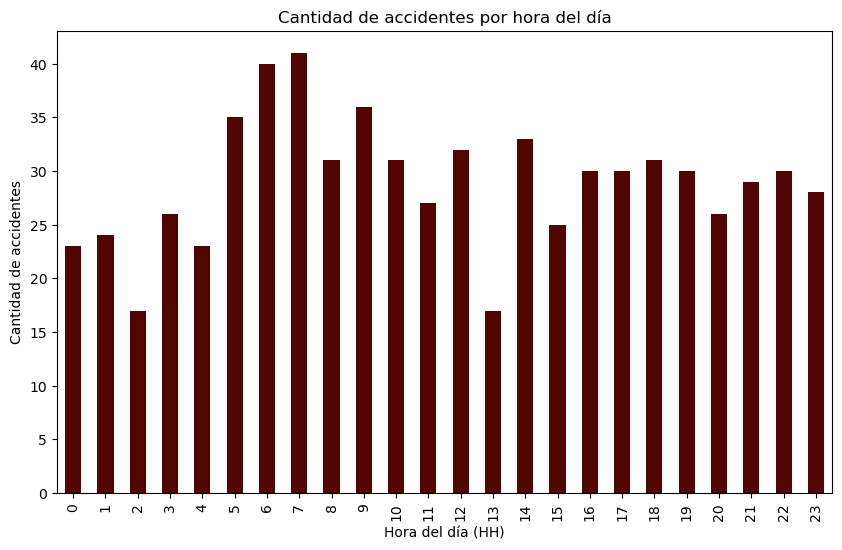

In [24]:
import matplotlib.pyplot as plt

# Filtrar valores no numéricos en la columna 'HH'
h_hechos_numericos = h_hechos[pd.to_numeric(h_hechos['HH'], errors='coerce').notnull()]

# Contar el número de ocurrencias de cada hora 'HH'
conteo_horas = h_hechos_numericos['HH'].value_counts().sort_index()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el conteo de ocurrencias de cada hora
conteo_horas.plot(kind='bar', color='#500500')

plt.title('Cantidad de accidentes por hora del día')
plt.xlabel('Hora del día (HH)')
plt.ylabel('Cantidad de accidentes')

# Mostrar el gráfico
plt.show()


## <center>Analisis del diccionario de la hoja "victimas" del dataset Homicidios

#### Se verifican datos nulos en la columna ["Unnamed2"] que llaman la atención, revisando el dataset completo se entiendo que son tablas anexadas (una sobre otra) y que provoca un poco de confusión para interpretar
#### En cuanto a los valores NaN de la columna ["variables y definiciones"] se entiende que se podría rellenar hacia abajo y darle sentido a la tabla

In [25]:
h_diccionario_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   variables y definiciones  12 non-null     object
 1   descripción               20 non-null     object
 2   Unnamed: 2                10 non-null     object
dtypes: object(3)
memory usage: 636.0+ bytes


In [26]:
h_diccionario_victimas

,variables y definiciones,descripción,Unnamed: 2
0,ID_hecho,identificador unico del siniestro,NaN
1,FECHA,fecha en formato dd/mm/aaaa,NaN
2,AAAA,año,NaN
3,MM,mes,NaN
4,DD,día del mes,NaN
5,ROL,Posición relativa al vehículo que presentaba l...,NaN
6,VICTIMA,Vehículo que ocupaba quien haya fallecido a se...,NaN
7,SEXO,Sexo informado por fuente policial de la víctima,NaN
8,EDAD,Edad de la víctima al momento del siniestro,NaN
9,FECHA_FALLECIMIENTO,Fecha de fallecimiento de la víctima,NaN


## <center>Analisis hoja "clas" de dataset Homicidios

#### Se verifica una hoja con datos pocos claros y utiles para un analisis

In [27]:
clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Original_victima         17 non-null     object 
 1   LESIONES                 17 non-null     object 
 2   FATALES INFORME ANUAL    17 non-null     object 
 3   Unnamed: 3               0 non-null      float64
 4   Original_acusado         28 non-null     object 
 5   LESIONES.1               28 non-null     object 
 6   FATALES INFORME ANUAL.1  28 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.7+ KB


In [28]:
clas

,Original_victima,LESIONES,FATALES INFORME ANUAL,Unnamed: 3,Original_acusado,LESIONES.1,FATALES INFORME ANUAL.1
0,PEATON,PEATON,PEATON,NaN,TRANSPORTE PUBLICO,TRANSPORTE PUBLICO,PASAJEROS
1,PEATON,PEATON,PEATON,NaN,SIN DATOS,SD,SIN DATOS
2,MOTO,MOTO,MOTO,NaN,AUTO PARTICULAR,AUTO,AUTO
3,AUTO,AUTO,AUTO,NaN,MOTO,MOTO,MOTO
4,AUTO PARTICULAR,AUTO,AUTO,NaN,CAMION,CAMION,CARGAS
5,TAXI,TAXI,AUTO,NaN,UTILITARIO,CAMIONETA,CARGAS
6,TAXI/REMIS,TAXI,AUTO,NaN,TRANSPORTE DE CARGAS / GRUA / VOLQUETES,CAMION,CARGAS
7,CAMION,CAMION,CARGAS,NaN,TREN / FURGON,TREN,TREN
8,TRANSPORTE DE CARGAS / GRUA,CAMION,CARGAS,NaN,OMNIBUS / MINIBUS,TRANSPORTE PUBLICO,PASAJEROS
9,UTILITARIO,CAMIONETA,CARGAS,NaN,TAXI/REMIS,TAXI,AUTO


# <center> Analisis de hoja Hechos de dataset Lesiones

<h3>Valores faltantes:<h3>
    Se observa que las columnas "Altura" y "Cruce" tienen una cantidad significativa de valores faltantes. Esto podría requerir imputación de datos o consideración especial durante el análisis.

In [29]:
l_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [30]:
l_hechos.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


## Grafico de barras para ver cantidad lesionados por año

#### (se puede ver que tenemos menos info en cuanto a cantidad de años vs los que tenemos en homicidios)

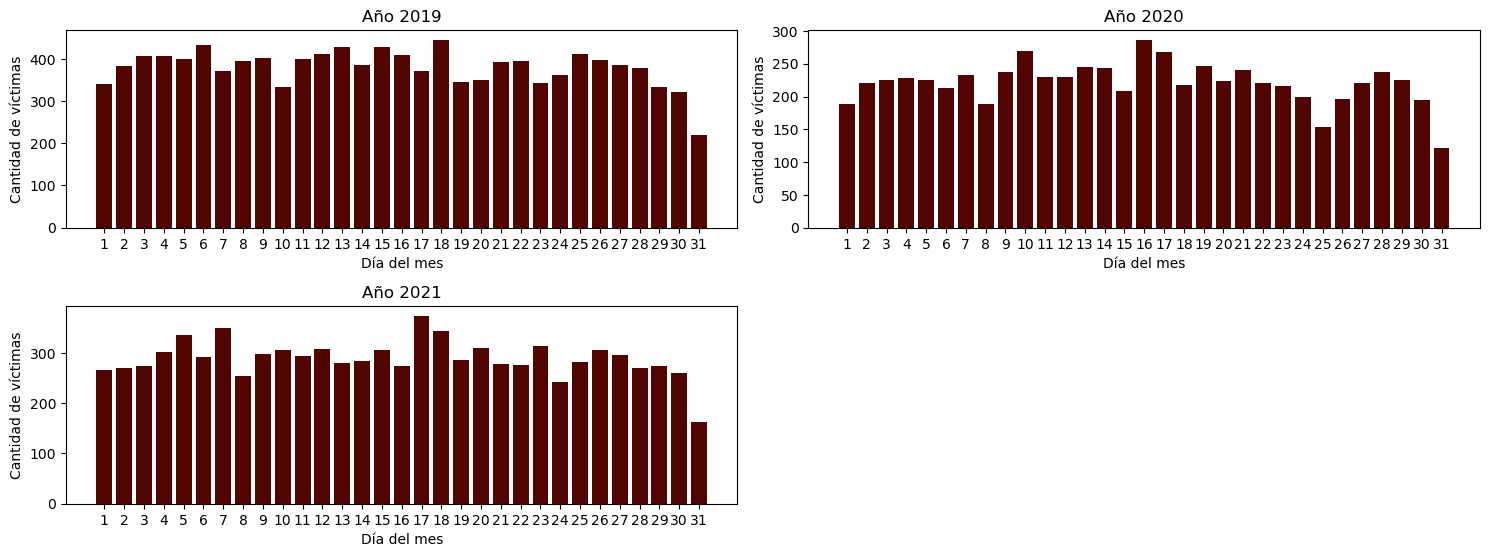

In [31]:
import matplotlib.pyplot as plt
import numpy as np

#se procede a transformar a la columna a fecha tipo datetime, ya que es objeto y no deja realizar EDA
l_hechos['fecha'] = pd.to_datetime(l_hechos['fecha'])

l_hechos['Dia'] = l_hechos['fecha'].dt.day
l_hechos['Mes'] = l_hechos['fecha'].dt.month
l_hechos['Año'] = l_hechos['fecha'].dt.year

# Dividir los datos por año
datos_por_año = l_hechos.groupby('Año')

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 8))

# Graficar por día, mes y año
for i, (año, datos_año) in enumerate(datos_por_año):
    plt.subplot(3, 2, i+1)
    datos_por_dia = datos_año.groupby('Dia')['n_victimas'].sum()
    plt.bar(datos_por_dia.index, datos_por_dia.values, color = "#500500")
    plt.title(f'Año {año}')
    plt.xlabel('Día del mes')
    plt.ylabel('Cantidad de víctimas')
    plt.xticks(np.arange(1, 32))  # Mostrar todos los días en el eje x

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Grafico de barras para ver cantidad lesionados por mes y año

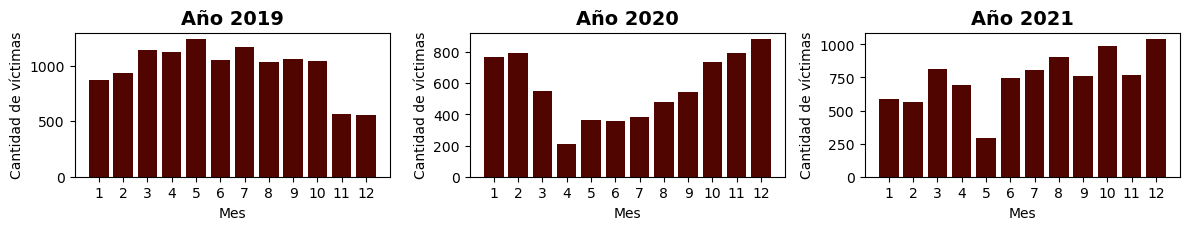

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Dividir los datos por año
datos_por_año = l_hechos.groupby('Año')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 4))

# Graficar por día, mes y año
for i, (año, datos_año) in enumerate(datos_por_año):
    plt.subplot(2, 3, i+1)
    datos_por_mes = datos_año.groupby('Mes')['n_victimas'].sum()
    plt.bar(datos_por_mes.index, datos_por_mes.values, color="#500500")
    plt.title(f'Año {año}', fontsize=14, fontweight='bold')  # Título más grande y en negrita
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de víctimas')
    plt.xticks(np.arange(1, 13))  # Mostrar todos los meses en el eje x

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Grafico de dispersion para ver cantidad lesionados por mes y año

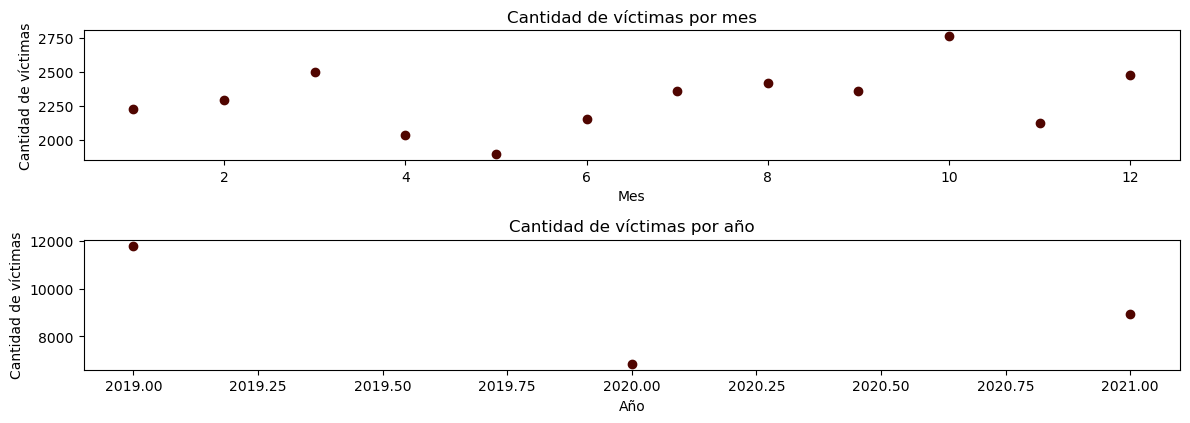

In [33]:
import matplotlib.pyplot as plt

# Crear una nueva figura
plt.figure(figsize=(12, 6))

# Graficar la cantidad total de víctimas por mes
plt.subplot(3, 1, 1)
victimas_por_mes = l_hechos.groupby('Mes')['n_victimas'].sum()
plt.scatter(victimas_por_mes.index, victimas_por_mes.values, color = "#500500")
plt.title('Cantidad de víctimas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de víctimas')

# Graficar la cantidad total de víctimas por año
plt.subplot(3, 1, 2)
victimas_por_año = l_hechos.groupby('Año')['n_victimas'].sum()
plt.scatter(victimas_por_año.index, victimas_por_año.values, color = "#500500")
plt.title('Cantidad de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Histograma para visualizar cantidad de lesionados por día, mes y año

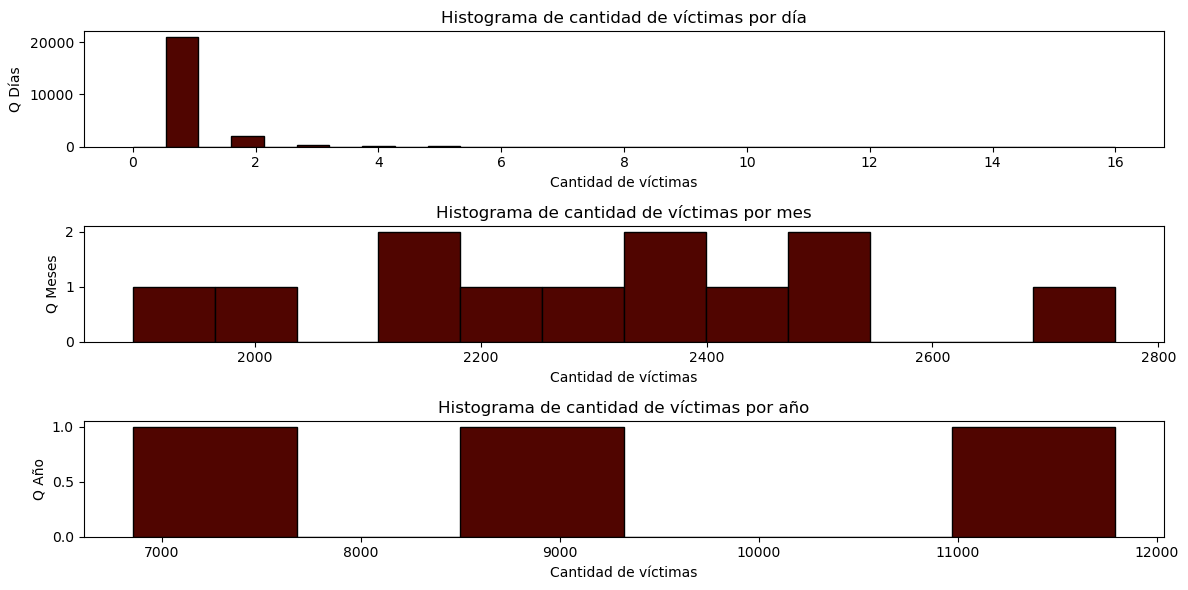

In [34]:
import matplotlib.pyplot as plt

# Crear una nueva figura
plt.figure(figsize=(12, 6))

# Histograma de la cantidad de víctimas por día
plt.subplot(3, 1, 1)
plt.hist(l_hechos['n_victimas'], bins=30, color='#500500', edgecolor='black') #30 bin = q de días
plt.title('Histograma de cantidad de víctimas por día')
plt.xlabel('Cantidad de víctimas')
plt.ylabel('Q Días')

# Histograma de la cantidad de víctimas por mes
plt.subplot(3, 1, 2)
plt.hist(l_hechos.groupby('Mes')['n_victimas'].sum(), bins=12, color='#500500', edgecolor='black') #12 bin = q de meses
plt.title('Histograma de cantidad de víctimas por mes')
plt.xlabel('Cantidad de víctimas')
plt.ylabel('Q Meses')

# Histograma de la cantidad de víctimas por año
plt.subplot(3, 1, 3)
plt.hist(l_hechos.groupby('Año')['n_victimas'].sum(), bins=6, color='#500500', edgecolor='black') #6 bin = q de años
plt.title('Histograma de cantidad de víctimas por año')
plt.xlabel('Cantidad de víctimas')
plt.ylabel('Q Año')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Grafico de barras para visualizar cantidad de lesionados por acusado

#### Se puede ver que en este dataset tenemos muchos "SD" por lo cual gran parte de la información esta incompleta

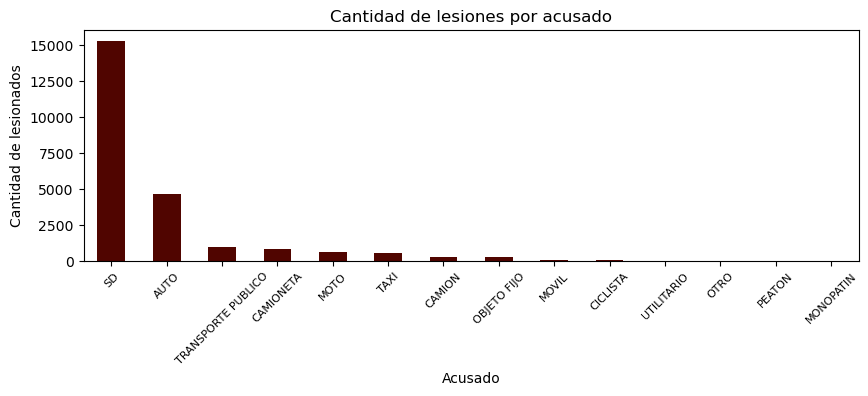

In [35]:
import matplotlib.pyplot as plt
import numpy as np

acusados_counts = l_hechos['acusado'].value_counts()

# Crear una lista de colores aleatorios
num_acusados = len(acusados_counts)
colores = np.random.rand(num_acusados, 3)  # RGB values

# Ajustar las dimensiones de la figura
plt.figure(figsize=(10, 3))  # Ancho: 10 pulgadas, Altura: 6 pulgadas

# Visualización de los resultados con colores aleatorios
acusados_counts.plot(kind='bar', color="#500500")
plt.title('Cantidad de lesiones por acusado')
plt.xlabel('Acusado')
plt.ylabel('Cantidad de lesionados')
plt.xticks(rotation=45, fontsize=8)

plt.xticks(rotation=45)
plt.show()


# Grafico de barras para visualizar cantidad lesionados por acusado por año

#### Se puede decir, que el año 2019 tiene mucha información obsoleta

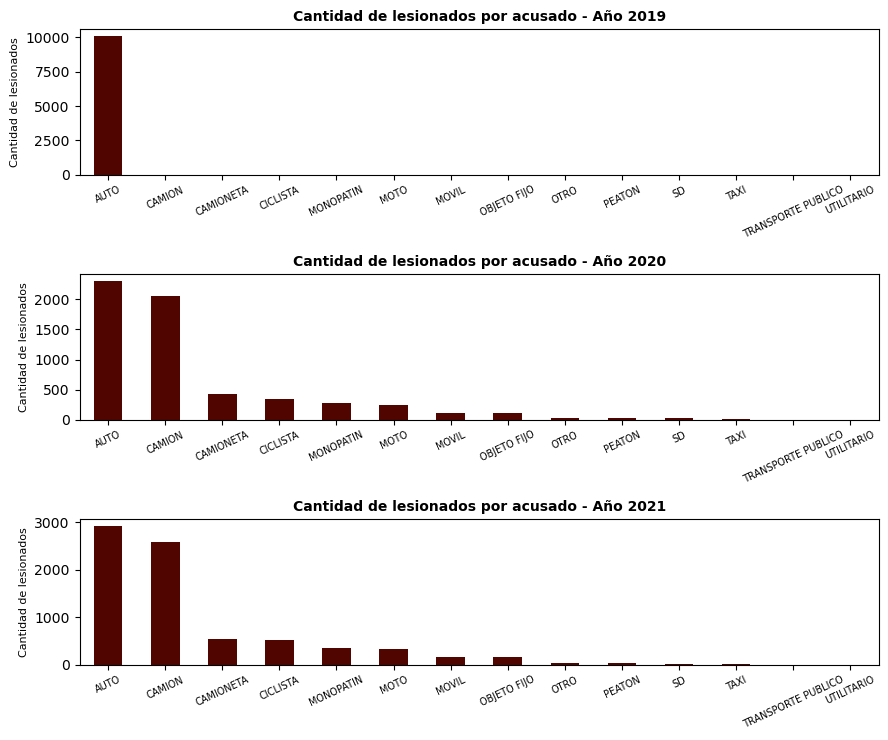

In [36]:
import matplotlib.pyplot as plt

# Se procede a transformar la columna 'fecha' a tipo datetime
l_hechos['fecha'] = pd.to_datetime(l_hechos['fecha'])

# Crear una columna de año
l_hechos['Año'] = l_hechos['fecha'].dt.year

# Cantidad de homicidios por acusado y por año
acusados_por_año = l_hechos.groupby(['acusado', 'Año']).size().unstack(fill_value=0)

# Obtener la cantidad de años en el dataset
cantidad_años = len(l_hechos['Año'].unique())

# Visualización de los resultados
fig, axs = plt.subplots(cantidad_años, 1, figsize=(9, cantidad_años * 2.5))

for i, año in enumerate(l_hechos['Año'].unique()):
    acusados_por_año[año].sort_values(ascending=False).plot(kind='bar', ax=axs[i], color="#500500")
    axs[i].set_title(f'Cantidad de lesionados por acusado - Año {año}', fontsize=10, fontweight='bold')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Cantidad de lesionados', fontsize=8)
    axs[i].set_xticklabels(acusados_por_año.index, fontsize=7, rotation=25)
    axs[i].legend().set_visible(False)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()


# <center>Analisis del diccionario de hechos lesionados del dataset

#### Se verifican datos nulos en la columna ["Unnamed2"] que llaman la atención, revisando el dataset completo se entiendo que son tablas anexadas (una sobre otra) y que provoca un poco de confusión para interpretar
#### En cuanto a los valores NaN de la columna ["variables y definiciones"] se entiende que se podría rellenar hacia abajo y darle sentido a la tabla

In [37]:
l_diccionario_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   variables y definiciones  33 non-null     object
 1   descripción               61 non-null     object
 2   Unnamed: 2                33 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [38]:
l_diccionario_hechos.head()

,variables y definiciones,descripción,Unnamed: 2
0,siniestro vial,Incidente ocurrido en una vía de acceso públic...,NaN
1,id,identificador unico del siniestro,NaN
2,n_victimas,cantidad de víctimas,NaN
3,aaaa,año,NaN
4,mm,mes,NaN


# <center>Analisis de la hoja de victimas lesionados del dataset

In [39]:
l_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID hecho          27605 non-null  object        
 1   AAA               27605 non-null  int64         
 2   MM                27605 non-null  int64         
 3   DD                27605 non-null  int64         
 4   FECHA             27605 non-null  datetime64[ns]
 5   VEHICULO_VICTIMA  27605 non-null  object        
 6   SEXO              27605 non-null  object        
 7   EDAD_VICTIMA      27605 non-null  object        
 8   GRAVEDAD          27605 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


In [40]:
l_victimas.head()

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD


### Se encuentra en la columna "EDAD_VICTIMA" valores númericos, excepto SD, los cuales se reemplazarán por null para evitar inconsistencias

In [41]:
l_victimas["EDAD_VICTIMA"].unique()

array([57, 'SD', 45, 27, 32, 21, 37, 33, 25, 23, 42, 53, 1, 62, 67, 75,
       40, 48, 3, 49, '25', 34, 52, 44, 28, 59, 50, 73, '26', 51, 16, 43,
       38, 64, 36, 84, 22, 26, '32', 20, 5, 39, 56, 69, 55, 46, 29, 41,
       54, 74, 70, 6, 30, 12, 83, 24, 35, 68, 15, 31, 19, '30', 9, 2, 13,
       18, 17, 58, 60, 47, '20', 7, 63, 66, 80, 65, 71, 79, 85, 61, 77,
       90, '43', '58', '45', 76, '54', '55', 89, '74', '19', 78, 91, 97,
       10, 72, 88, 11, 81, '31', 8, 14, '50', '21', 96, '27', '34', '40',
       '28', '59', '39', 82, 87, 86, '38', '37', 'sd', '44', '29', '35',
       '42', '18', 4, '23', '41', 92, '46', '72', '36', '24', '87', '16',
       '14', '33', '61', '12', '49', '62', '90', '22', '60', '64', '56',
       '78', '65', '51', '53', '66', '71', '76', '47', '52', '48', '13',
       '63', '68', '15', '57', '70', '73', '80', '67', '5', '84', '94',
       '86', '3', '69', '6', '17', '91', '7', '8', '82', '75', '85', '77',
       '4', '81', '83', '2', '11', '88', '9', '79

In [42]:
# Reemplazar el valor 'SD' por NaN en la columna 'EDAD_VICTIMA'
l_victimas['EDAD_VICTIMA'].replace('SD', np.nan, inplace=True)
l_victimas["EDAD_VICTIMA"].unique()

array([57, nan, 45, 27, 32, 21, 37, 33, 25, 23, 42, 53, 1, 62, 67, 75, 40,
       48, 3, 49, '25', 34, 52, 44, 28, 59, 50, 73, '26', 51, 16, 43, 38,
       64, 36, 84, 22, 26, '32', 20, 5, 39, 56, 69, 55, 46, 29, 41, 54,
       74, 70, 6, 30, 12, 83, 24, 35, 68, 15, 31, 19, '30', 9, 2, 13, 18,
       17, 58, 60, 47, '20', 7, 63, 66, 80, 65, 71, 79, 85, 61, 77, 90,
       '43', '58', '45', 76, '54', '55', 89, '74', '19', 78, 91, 97, 10,
       72, 88, 11, 81, '31', 8, 14, '50', '21', 96, '27', '34', '40',
       '28', '59', '39', 82, 87, 86, '38', '37', 'sd', '44', '29', '35',
       '42', '18', 4, '23', '41', 92, '46', '72', '36', '24', '87', '16',
       '14', '33', '61', '12', '49', '62', '90', '22', '60', '64', '56',
       '78', '65', '51', '53', '66', '71', '76', '47', '52', '48', '13',
       '63', '68', '15', '57', '70', '73', '80', '67', '5', '84', '94',
       '86', '3', '69', '6', '17', '91', '7', '8', '82', '75', '85', '77',
       '4', '81', '83', '2', '11', '88', '9', '79'

## Se detectan oportunidades de mejora en cuanto a carga de datos, ya que la columna l_victimas['SEXO'], tiene diferentes formas de imputación de un mismo valor:

In [43]:
l_victimas['SEXO'].unique()

array(['Varon', 'SD', 'Mujer', 'varon', 'mujer', 'MUJER', 'sd', 'Mujer '],
      dtype=object)

In [44]:
# Convertir todos los valores de la columna 'SEXO' a minúsculas
l_victimas['SEXO'] = l_victimas['SEXO'].str.lower()

# Reemplazar 'sd' por NaN en la columna 'SEXO'
l_victimas['SEXO'].replace('sd', np.nan, inplace=True)

# Estandarizar 'varon' y 'mujer' en la columna 'SEXO'
l_victimas['SEXO'].replace({'varon': 'VARON', 'mujer ': 'mujer', 'hombre': 'VARON'}, inplace=True)


In [45]:
l_victimas['SEXO'].unique()

array(['VARON', nan, 'mujer'], dtype=object)

#### Se detectan oportunidades de mejora en cuanto a carga de datos, aun asi se puede ver la tendencia

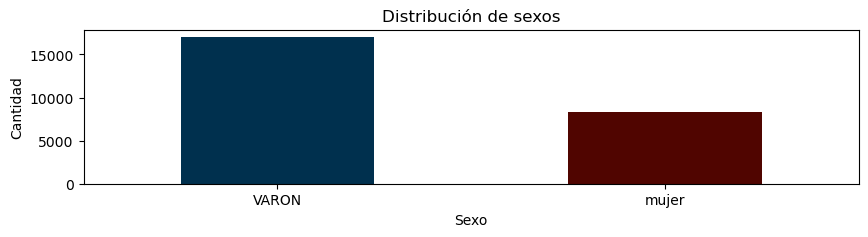

In [46]:
# Gráfico de barras para la distribución de sexos
plt.figure(figsize=(10, 2))
l_victimas['SEXO'].value_counts().plot(kind='bar', color=['#00304E', '#500500'])
plt.title('Distribución de sexos')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


## Gráfico de torta para visualizar en que grupo de edades hay mayor cantidad de lesionados

In [47]:
l_victimas['EDAD_VICTIMA'].unique()

array([57, nan, 45, 27, 32, 21, 37, 33, 25, 23, 42, 53, 1, 62, 67, 75, 40,
       48, 3, 49, '25', 34, 52, 44, 28, 59, 50, 73, '26', 51, 16, 43, 38,
       64, 36, 84, 22, 26, '32', 20, 5, 39, 56, 69, 55, 46, 29, 41, 54,
       74, 70, 6, 30, 12, 83, 24, 35, 68, 15, 31, 19, '30', 9, 2, 13, 18,
       17, 58, 60, 47, '20', 7, 63, 66, 80, 65, 71, 79, 85, 61, 77, 90,
       '43', '58', '45', 76, '54', '55', 89, '74', '19', 78, 91, 97, 10,
       72, 88, 11, 81, '31', 8, 14, '50', '21', 96, '27', '34', '40',
       '28', '59', '39', 82, 87, 86, '38', '37', 'sd', '44', '29', '35',
       '42', '18', 4, '23', '41', 92, '46', '72', '36', '24', '87', '16',
       '14', '33', '61', '12', '49', '62', '90', '22', '60', '64', '56',
       '78', '65', '51', '53', '66', '71', '76', '47', '52', '48', '13',
       '63', '68', '15', '57', '70', '73', '80', '67', '5', '84', '94',
       '86', '3', '69', '6', '17', '91', '7', '8', '82', '75', '85', '77',
       '4', '81', '83', '2', '11', '88', '9', '79'

In [48]:
l_victimas['EDAD_VICTIMA'].describe()

count     23615
unique      190
top          29
freq        668
Name: EDAD_VICTIMA, dtype: int64

## se crean grupos de cada 15 años para llegar a una conclusión, se dejan los datos de todos los grupos porque son solo 7 (incluyendo Sin datos)

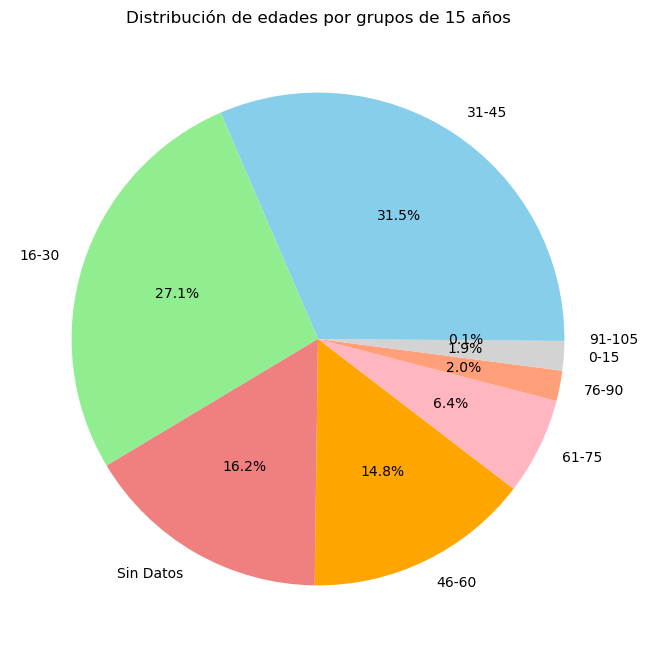

In [49]:
# Reemplazar 'SD' y 'sd' por NaN en la columna 'EDAD_VICTIMA'
l_victimas['EDAD_VICTIMA'].replace(['SD', 'sd',''], np.nan, inplace=True)

# Rellenar NaN con una cadena vacía en la columna 'EDAD_VICTIMA'
l_victimas['EDAD_VICTIMA'].fillna(-1, inplace=True)

# Crear grupos de edades de 15 años de diferencia
bins = [-1, 0, 15, 30, 45, 60, 75, 90, 105]
labels = ["Sin Datos", '0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '91-105']
l_victimas['EDAD_GRUPO'] = pd.cut(l_victimas['EDAD_VICTIMA'].astype(int), bins=bins, labels=labels, right=False)

# Gráfico de torta para la distribución de edades por grupos
plt.figure(figsize=(8, 8))
l_victimas['EDAD_GRUPO'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'lightsalmon', 'lightgrey'])
plt.title('Distribución de edades por grupos de 15 años')
plt.ylabel('')
plt.show()


In [50]:
l_victimas['EDAD_GRUPO'].describe()

count     27605
unique        8
top       31-45
freq       8687
Name: EDAD_GRUPO, dtype: object

## Se gráfica cantidad de lesionados según su gravedad

#### la información del dataset tiene muchos más datos "Sin datos" que otros que apliquen valor

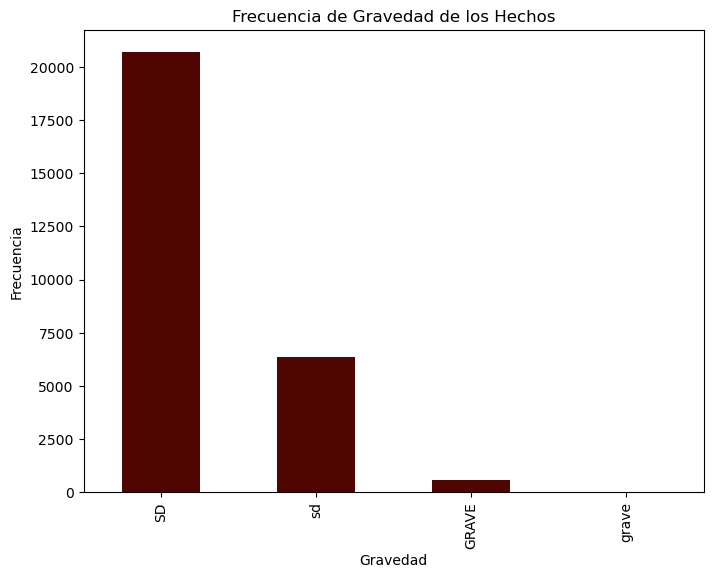

In [51]:
import matplotlib.pyplot as plt

# Agrupar los datos por la columna "GRAVEDAD" y contar el número de ocurrencias en cada categoría
gravedad_counts = l_victimas['GRAVEDAD'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
gravedad_counts.plot(kind='bar', color='#500600')

# Configurar el título y las etiquetas de los ejes
plt.title('Frecuencia de Gravedad de los Hechos')
plt.xlabel('Gravedad')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


# <center>Analisis del diccionario de victimas lesionados del dataset

#### Se verifican datos nulos en la columna ["Unnamed2"] que llaman la atención, revisando el dataset completo se entiendo que son tablas anexadas (una sobre otra) y que provoca un poco de confusión para interpretar
#### En cuanto a los valores NaN de la columna ["variables y definiciones"] se entiende que se podría rellenar hacia abajo y darle sentido a la tabla

In [52]:
l_diccionario_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   variables y definiciones  12 non-null     object
 1   descripción               27 non-null     object
 2   Unnamed: 2                18 non-null     object
dtypes: object(3)
memory usage: 876.0+ bytes


In [53]:
l_diccionario_victimas

,variables y definiciones,descripción,Unnamed: 2
0,ID hecho,identificador unico del siniestro,NaN
1,AÑO,año,NaN
2,MES,mes,NaN
3,DIA,día del mes,NaN
4,FECHA,fecha en formato dd/mm/aaaa,NaN
5,VEHICULO_VICTIMA,Vehículo que ocupaba quien haya fallecido a se...,NaN
6,SEXO,Sexo de la víctima según registro policial,NaN
7,EDAD_VICTIMA,Edad en años enterios de la víctima en registr...,NaN
8,GRAVEDAD,Nivel máximo conocido de gravedad de la lesión...,NaN
9,NaN,NaN,NaN
